## notes:

https://knowmledge.com/2023/09/23/ml-zoomcamp-2023-machine-learning-for-regression-part-10/

In [1]:
#!pip install seaborn

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [61]:
df=pd.read_csv("car_fuel_efficiency.csv")

In [62]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [63]:
df.shape

(9704, 11)

## Preparing the dataset
Use only the following columns:

'engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg'

In [64]:
df2= df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [65]:
df2.shape

(9704, 5)

In [66]:
df2.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

## EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

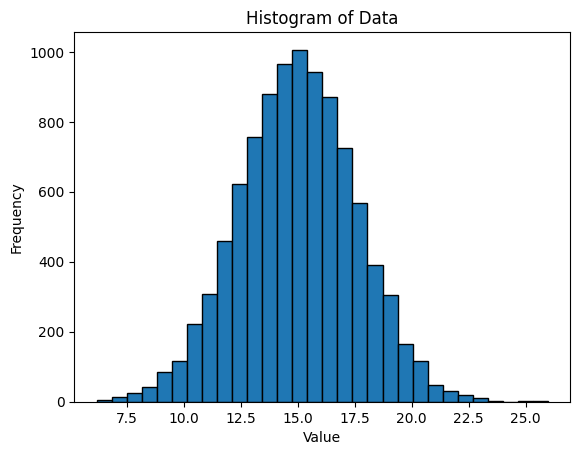

In [67]:
import matplotlib.pyplot as plt
import numpy as np

    #data = np.random.exponential(scale=2, size=1000) # Example: exponential distribution with a tail
plt.hist(df['fuel_efficiency_mpg'], bins=30, edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Question 1
There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [68]:
columns_with_missing_values = df2.columns[df2.isna().any()].tolist()
print(f"Columns with missing values: {columns_with_missing_values}")


Columns with missing values: ['horsepower']


# Question 2
What's the median (50% percentile) for variable 'horsepower'?

49
99
149
199

In [69]:
df2['horsepower'].describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [70]:
df2['horsepower'].median()

np.float64(149.0)

## Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
    
Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


In [71]:
'''for col in df2.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()
    '''

'for col in df2.columns:\n    print(col)\n    print(df[col].unique()[:5])\n    print(df[col].nunique())\n    print()\n    '

In [131]:
df2.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

n = len(df2)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train

df_train = df2.iloc[:n_train]
df_val = df2.iloc[n_train:n_train+n_val]
df_test = df2.iloc[n_train+n_val:]


idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df2.iloc[idx[:n_train]]
df_val = df2.iloc[idx[n_train:n_train+n_val]]
df_test = df2.iloc[idx[n_train+n_val:]]


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values


In [132]:
n = len(df2)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [133]:
n_val, n_test, n_train


(1940, 1940, 5824)

In [134]:
df_train = df2.iloc[:n_train]
df_val = df2.iloc[n_train:n_train+n_val]
df_test = df2.iloc[n_train+n_val:]

In [135]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [136]:
df_train = df2.iloc[idx[:n_train]]
df_val = df2.iloc[idx[n_train:n_train+n_val]]
df_test = df2.iloc[idx[n_train+n_val:]]

In [137]:
df_train.head()


,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [138]:
len(df_train), len(df_val), len(df_test)


(5824, 1940, 1940)

In [139]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [140]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values


In [142]:
y_val.shape, y_train.shape

((1940,), (5824,))

In [122]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

# Question 3
We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.
    
Try both options. For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.
    
Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

## training a linear regression

In [128]:
df_train.columns
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
#base = ['engine_displacement', 'horsepower', 'vehicle_weight']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train,y_train)
w0, w
y_pred = w0 + X_train.dot(w)

In [130]:
y_pred.shape

(5824,)

In [84]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
#base = ['engine_displacement', 'horsepower', 'vehicle_weight']
    

In [85]:
X_train = df_train[base].fillna(0).values

In [86]:
w0, w = train_linear_regression(X_train,y_train)
w0, w
y_pred = w0 + X_train.dot(w)

In [87]:
w0, w

(np.float64(28.827365474598718),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992869e-04]))

In [88]:
y_pred = w0 + X_train.dot(w)

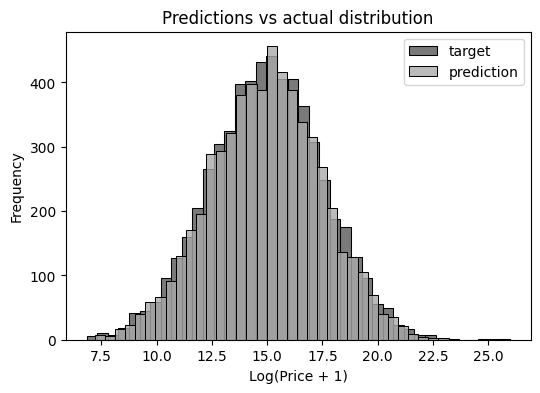

In [89]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [90]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [91]:

round(rmse(y_train, y_pred), 2)

np.float64(0.52)

#### case of filling missing values with mean of df_train

In [92]:
m = df_train['horsepower'].mean()
m1 = round(m, 2)
m1

np.float64(149.54)

In [93]:
X_train = df_train[base].fillna(m1).values

In [94]:
w0, w = train_linear_regression(X_train,y_train)
w0, w


(np.float64(28.925257052008142),
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

In [95]:
y_pred = w0 + X_train.dot(w)

#### RMSE

In [40]:
round(rmse(y_train, y_pred), 2)

np.float64(0.46)

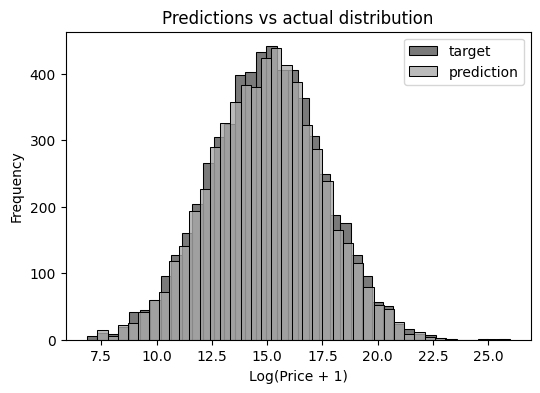

In [41]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

<Axes: ylabel='Count'>

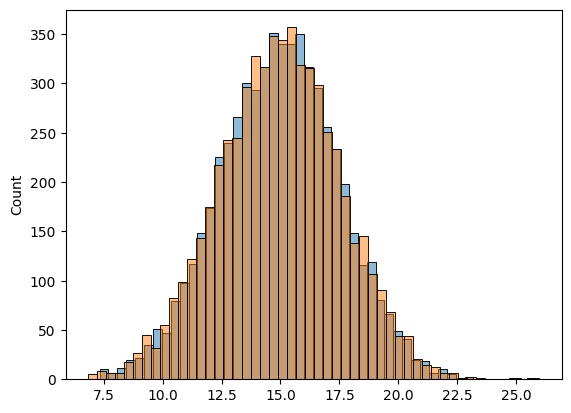

In [42]:
sns.histplot(y_pred, alpha=0.5 )
sns.histplot(y_train, alpha =0.5 )


### from the lesson 

In [43]:
def dot(xi,w):
    n=len(xi)
    res=0.0
    for j in range(n):
        res=res+ xi[j]*w[j]
    return res

In [44]:
def lienar_regression(xi):
    return w0+ dot(xi,w)

#### 2.7 weights

weights

#### 2.8 train LR

In [45]:
df2.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

In [46]:
df2['model_year'].unique()

array([2003, 2007, 2018, 2009, 2008, 2012, 2020, 2016, 2005, 2014, 2010,
       2000, 2006, 2013, 2011, 2004, 2002, 2022, 2017, 2001, 2023, 2019,
       2015, 2021])

In [47]:
df_train[base].fillna(0).isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

#### 2.9 RMSE

In [48]:
def rmse(y, y_pred):
    se = (y-y_pred)**2
    
    mse= se.mean()
    return np.sqrt(mse)

#### 2.10 Computing RMSE on Validation Data

In [49]:
base = list(df2.columns)
base

['engine_displacement',
 'horsepower',
 'vehicle_weight',
 'model_year',
 'fuel_efficiency_mpg']

In [150]:
# function to prepare any dataset

def prepare_X(df):
    # selecting num columns
    df_num=df[base]
    # filling missed values
    df_num = df_num.fillna(df_num.mean())
    # extracting values into an array
    X=  df_num.values
    return X
    

##### training

In [51]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

##### Validation

In [52]:
X_val= prepare_X(df_val)
y_pred=w0+X_val.dot(w)

In [53]:
rmse(y_val, y_pred)

np.float64(4.326682839377033e-10)

In [54]:
df2.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

#### 2.11 simple feature engineering

In [55]:
def prepare_X(df):
    df=df.copy()
    # selecting num columns
    df['age'] = 2025 - df.model_year
    features = base+['age']
    df_num=df[features]
    # filling missed values
    df_num = df_num.fillna(df_num.mean())
    # extracting values into an array
    X=  df_num.values
    return X
    

In [56]:
X_train = prepare_X(df_train)


In [58]:
df_train.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

In [60]:
X_train.shape

(5824, 6)

In [67]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.017124870075924753)

<Axes: ylabel='Count'>

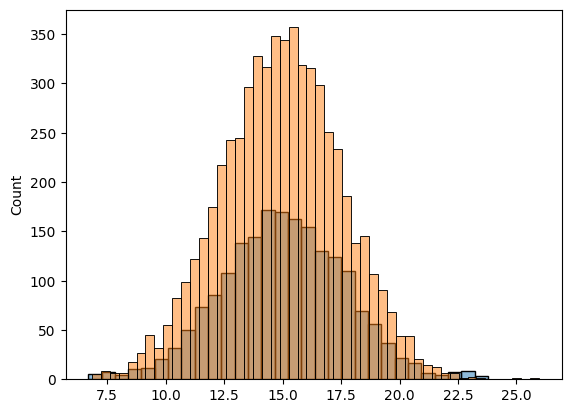

In [68]:
sns.histplot(y_pred, alpha=0.5 )
sns.histplot(y_train, alpha =0.5 )

#### 2.12 categorical

In [80]:
# to turn the boolean into int

df['n_2']= (df.num_doors==2).astype('int')

In [81]:
df['n_4']= (df.num_doors==4).astype('int')

In [82]:
df['n_3']= (df.num_doors==3).astype('int')

In [85]:
for v in [2,3,4]:
    df_train['n_%s' %v]= (df.num_doors==v).astype('int')

In [86]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg', 'n_4', 'n_3', 'n_2'],
      dtype='object')

In [87]:
df_train.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg', 'n_%s', 'n_2', 'n_3', 'n_4'],
      dtype='object')

In [93]:
del df_train['n_4']

###### modify prepare function

In [121]:
def prepare_X(df):
    df=df.copy()
    base= list(df.columns)
    # filling missed values
    #df_num = df.fillna(df_num.mean())
    features=base.copy()

    df['age'] = 2025 - df.model_year
    
    features.append('age')
    for v in [2,3,4]:
        df['n_%s' %v]= (df.num_doors==v).astype('int')
        features.append('n_%s' % v)
    df_num=df[features]

    df_num = df_num.fillna(0)
    # selecting num columns
    # adding age
   
     # categorical
  
    
   
    # extracting values into an array
    X=  df_num.values
    return X
    

In [127]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg', 'n_4', 'n_3', 'n_2'],
      dtype='object')

In [128]:
list(df.num_cylinders.value_counts().head().index)

[4.0, 3.0, 2.0, 5.0, 6.0]

In [135]:
df2.engine_displacement.nunique()

36

#### 2.13 Regularization

w=(X.T X).inv.X.T.y

the problem is in this part: (X.T X).inv as sometimes the inverse does not exist


In [34]:
X=[
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5.0000001]
]
y = [1, 2, 3, 1, 2, 3]
 
# duplicate columns
X=np.array(X)
X

array([[4.       , 4.       , 4.       ],
       [3.       , 5.       , 5.       ],
       [5.       , 1.       , 1.       ],
       [5.       , 4.       , 4.       ],
       [7.       , 5.       , 5.       ],
       [4.       , 5.       , 5.0000001]])

In [35]:
XTX= X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [36]:
np.linalg.inv(XTX)

array([[ 3.92646538e-02, -1.54615164e+05,  1.54615121e+05],
       [-1.54615170e+05,  3.51843724e+13, -3.51843721e+13],
       [ 1.54615129e+05, -3.51843721e+13,  3.51843718e+13]])

In [37]:
XTX_inv = np.linalg.inv(XTX)

In [38]:
XTX_inv.dot(X.T).dot(y)

array([ 2.73776578e-01, -4.41093100e+06,  4.41093113e+06])

In [39]:
# to solve the problem we can add a small number on the diagonal

In [40]:
XTX = [
    [1,2,2],
    [2,1.00001, 1.000001],
    [2, 1.0000001, 1.0001],
]

In [43]:


# Adding a small number to the diagonal
# helps to control. So the numbers of w become smaller
XTX = [
    [1, 2, 2],
    [2, 1, 1],
    [2, 1, 1]
]
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [44]:
XTX+np.eye(3)

array([[2., 2., 2.],
       [2., 2., 1.],
       [2., 1., 2.]])

In [55]:
XTX=XTX+ 0.1 * np.eye(3)

In [54]:
np.linalg.inv(XTX)

array([[ 0.08037833, -0.0114727 , -0.0114727 ],
       [-0.0114727 ,  0.07894568, -0.00430371],
       [-0.0114727 , -0.00430371,  0.07894568]])

The larger the number alpha adding to the diagonal, the more we have these weights under control. The reason why this works this way is, that this decrease the likelihood that these two columns are just copies of each other.

##### re implementing the linear regression function

In [57]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]


In [190]:
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [191]:

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)
# Output: 0.45685446091134857

np.float64(0.4633875463745879)

#### 2.14 Tuning the model 
finding the best parameter

best value for r

In [175]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred)
     
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)
    

reg parameter:  0.0 bias term:  28.92525995211667 rmse:  0.46362369950314425
reg parameter:  1e-05 bias term:  28.920734457898266 rmse:  0.4636232150529379
reg parameter:  0.0001 bias term:  28.880068643722012 rmse:  0.46361888374449434
reg parameter:  0.001 bias term:  28.47961317027349 rmse:  0.4635783407934924
reg parameter:  0.01 bias term:  25.01148264610365 rmse:  0.4633875463745879
reg parameter:  0.1 bias term:  11.277820454164704 rmse:  0.4654524183759509
reg parameter:  1 bias term:  1.7374758273385476 rmse:  0.4695095104384158
reg parameter:  10 bias term:  0.1836835983182771 rmse:  0.47037007231179845


# Question 4

Now let's train a regularized linear regression.

For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If multiple options give the same best RMSE, select the smallest r.



In [151]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [152]:
df_train.columns
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
#base = ['engine_displacement', 'horsepower', 'vehicle_weight']
#X_train = df_train[base].fillna(0).values
X_train = prepare_X(df_train)

w0, w = train_linear_regression_reg(X_train,y_train, r=0.01)
w0, w
y_pred = w0 + X_train.dot(w)

In [153]:
y_pred.shape

(5824,)

In [154]:
def rmse(y, y_pred):
    se = (y-y_pred)**2
    
    mse= se.mean()
    
    return np.sqrt(mse)

In [155]:
rmse(y_train, y_pred)

np.float64(0.46262290852514065)

##### different r


[0, 0.01, 0.1, 1, 5, 10, 100]

In [165]:
w0, w = train_linear_regression_reg(X_train,y_train, r=0)
w0, w
y_pred = w0 + X_train.dot(w)
round(rmse(y_train, y_pred), 2)

np.float64(0.46)

In [164]:
w0, w = train_linear_regression_reg(X_train,y_train, r=0.01)
w0, w
y_pred = w0 + X_train.dot(w)
round(rmse(y_train, y_pred),2)

np.float64(0.46)

In [167]:
w0, w = train_linear_regression_reg(X_train,y_train, r=0.1)
w0, w
y_pred = w0 + X_train.dot(w)
round(rmse(y_train, y_pred),2)

np.float64(0.47)

In [168]:
w0, w = train_linear_regression_reg(X_train,y_train, r=1)
w0, w
y_pred = w0 + X_train.dot(w)
round(rmse(y_train, y_pred),2)

np.float64(0.47)

In [ ]:
[0, 0.01, 0.1, 1, 5, 10, 100]

In [170]:
w0, w = train_linear_regression_reg(X_train,y_train, r=5)
w0, w
y_pred = w0 + X_train.dot(w)
round(rmse(y_train, y_pred),2)

np.float64(0.47)

In [171]:
w0, w = train_linear_regression_reg(X_train,y_train, r=10)
w0, w
y_pred = w0 + X_train.dot(w)
round(rmse(y_train, y_pred),2)

np.float64(0.47)

In [172]:
w0, w = train_linear_regression_reg(X_train,y_train, r=100)
w0, w
y_pred = w0 + X_train.dot(w)
round(rmse(y_train, y_pred),2)

np.float64(0.47)

##### finding the best value for r
 

In [178]:
for r in [0,  0.01, 1,  10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred)
     
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

reg parameter:  0 bias term:  28.92525995211667 rmse:  0.46362369950314425
reg parameter:  0.01 bias term:  25.01148264610365 rmse:  0.4633875463745879
reg parameter:  1 bias term:  1.7374758273385476 rmse:  0.4695095104384158
reg parameter:  10 bias term:  0.1836835983182771 rmse:  0.47037007231179845
reg parameter:  100 bias term:  0.018480250159485886 rmse:  0.4704647158421216


In [ ]:
we look at what make the bias not huge and rmse acceptable

Model Selection Discussion
A series of linear regression models were trained with different regularization strengths (λ) to balance model accuracy and stability. As λ increased from 0 to 100, the bias term decreased substantially—from 28.93 at λ=0 to 0.018 at λ=100—indicating greater coefficient shrinkage and reduced sensitivity to noise. However, this came with a gradual rise in RMSE from 0.4636 to 0.4705. The most favorable trade-off was observed at λ = 1, where the RMSE (0.4695) remained close to the minimum while the bias term dropped dramatically to 1.74. This setting provides a well-regularized model with good predictive performance and improved generalization, avoiding both overfitting (low λ) and underfitting (high λ).

In [180]:
r=0.01
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
print(score)

0.4633875463745879


In [189]:
np.std(score)

np.float64(0.0)

# Question 5 

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))


In [193]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]



In [194]:
def prepare_X(df):
    # selecting num columns
    df_num=df[base]
    # filling missed values
    df_num = df_num.fillna(0)
    # extracting values into an array
    X=  df_num.values
    return X

In [202]:
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
n = len(df2)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train

df_train = df2.iloc[:n_train]
df_val = df2.iloc[n_train:n_train+n_val]
df_test = df2.iloc[n_train+n_val:]



scores=[]

In [207]:
# seed values [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
for s in  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df2.iloc[idx[:n_train]]
    df_val = df2.iloc[idx[n_train:n_train+n_val]]
    df_test = df2.iloc[idx[n_train+n_val:]]


    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    # now get the scores
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
 
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
     
    score = round(rmse(y_val, y_pred), 3)
    
    scores.append(score)
    #print(round(score,2))
    print("seed : ",s, "              rmse: ",score)

seed :  0               rmse:  0.521
seed :  1               rmse:  0.521
seed :  2               rmse:  0.523
seed :  3               rmse:  0.516
seed :  4               rmse:  0.511
seed :  5               rmse:  0.528
seed :  6               rmse:  0.531
seed :  7               rmse:  0.509
seed :  8               rmse:  0.515
seed :  9               rmse:  0.513


In [198]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
score = rmse(y_val, y_pred)
score     
#print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

np.float64(0.5206531296297207)

In [208]:
print(scores)

[np.float64(0.5206531296297207), np.float64(0.5213388912866506), np.float64(0.5228069974913666), np.float64(0.5159516741255491), np.float64(0.5109129460116937), np.float64(0.5283406460212935), np.float64(0.5313910658190373), np.float64(0.509067038739038), np.float64(0.5147399129482789), np.float64(0.513186590829269), np.float64(0.5206531296297207), np.float64(0.5213388912866506), np.float64(0.5228069974913666), np.float64(0.5159516741255491), np.float64(0.5109129460116937), np.float64(0.5283406460212935), np.float64(0.5313910658190373), np.float64(0.509067038739038), np.float64(0.5147399129482789), np.float64(0.513186590829269), np.float64(0.521), np.float64(0.521), np.float64(0.523), np.float64(0.516), np.float64(0.511), np.float64(0.528), np.float64(0.531), np.float64(0.509), np.float64(0.515), np.float64(0.513)]


In [210]:
round(np.std(scores),3)

np.float64(0.007)

# Question 6
Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

Options:

0.15
0.515
5.15
51.5

#### 2.15 Using the model


In [212]:
df_full_train= pd.concat([df_train, df_val])
df_full_train.shape
df_full_train.head()


,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,240,136.0,4050.512290,2006,10.304700
1,190,141.0,3195.866942,2017,13.479434
2,200,184.0,3006.164370,2017,16.190653
3,200,NaN,2947.143980,2022,15.446503
4,250,132.0,3114.371978,2001,14.472172


In [213]:
X_full_train  = prepare_X(df_full_train)

In [215]:
X_full_train  

array([[ 240.        ,  136.        , 4050.51228957, 2006.        ],
       [ 190.        ,  141.        , 3195.86694158, 2017.        ],
       [ 200.        ,  184.        , 3006.16436968, 2017.        ],
       ...,
       [ 180.        ,  154.        , 3346.96567067, 2018.        ],
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 260.        ,  174.        , 2702.25730066, 2011.        ]],
      shape=(7764, 4))

In [217]:
y_full_train = np.concatenate([y_train, y_val])

In [218]:
w0, w = train_linear_regression_reg(X_full_train,y_full_train, 0.001)


In [220]:
w0, w

(np.float64(26.946834793073375),
 array([ 1.45147512e-05,  3.56475200e-03, -5.01712541e-03,  1.29155334e-03]))

In [221]:
# now we do the same with testing dataset

In [222]:
X_test = prepare_X(df_test)
y_pred = w0+ X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.5156261299185628)

In [ ]:
#### 2.15 Using the model
